In [0]:
# Fill in your name using the format below and student ID number
your_name = "FAVIA, ANDREA"
student_id = "1498010"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
#!pip install --quiet openml 

     |████████████████████████████████| 163kB 2.8MB/s 


In [4]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi ANDREA, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
#base_dir = '/content/drive/My Drive/assignment-3-faviasono' # For Google Colab
base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)  

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

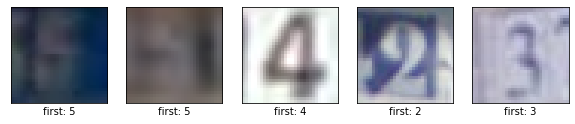

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        res1 =  np.argmax(y[n])
        text = 'first: '+str((res1+1)%10)
        axes[n].set_xlabel(text) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.utils import Sequence

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras import models,layers

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
___________

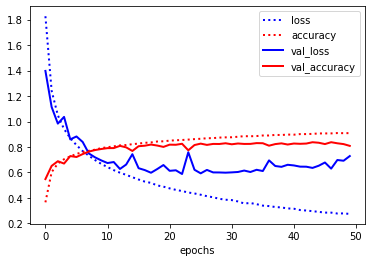

In [16]:
def build_model_1_1():

  initializer = None #With no initialization

  model = models.Sequential()
  model.add(layers.Reshape((32*32*3,), input_shape=(32,32,3)))

  model.add(layers.Dense(512,kernel_initializer=initializer, activation='relu'))
  model.add(layers.Dense(256,kernel_initializer=initializer,activation='relu')) 
  model.add(layers.Dense(128,kernel_initializer=initializer,activation='relu')) 
  model.add(layers.Dense(64,kernel_initializer=initializer,activation='relu')) 
    
  model.add(layers.Dense(10,kernel_initializer=initializer,activation='softmax'))


  model.compile(optimizer=optimizers.SGD(momentum=0.7,nesterov=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=32)

answer_q_1_1 = """I played with number of hidden layers, neuron sizes, and initializer. Also,tried different optimizers and the best I've found
was the Nesterov Advanced Gradient (NAG), in particular with momentum  mu=0.7 and lr=0.01. It accelerates the convergence of the gradient in the right direction, especially in shallow networks.
I ended up with a 4-hidden-layers (from 512 to 64) and trained for 50 epochs(epoch_size=32) 
The final model results in 83.71% accuracy on validation but it present overfitting. 
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 697,930
Trainable params: 697,930
Non-trainable params: 0
_______________

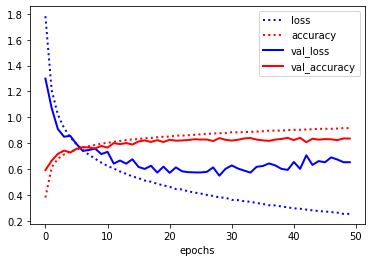

In [18]:
# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val
 

# Adjusted model
def build_model_1_2():

  initializer = None #With no initialization

  model = models.Sequential()
  model.add(layers.Reshape((32*32*1,), input_shape=(32,32,1)))

  model.add(layers.Dense(512,kernel_initializer=initializer, activation='relu'))
  model.add(layers.Dense(256,kernel_initializer=initializer,activation='relu')) 
  model.add(layers.Dense(128,kernel_initializer=initializer,activation='relu')) 
  model.add(layers.Dense(64,kernel_initializer=initializer,activation='relu')) 
    
  model.add(layers.Dense(10,kernel_initializer=initializer,activation='softmax'))


  model.compile(optimizer=optimizers.SGD(momentum=0.7,nesterov=True),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
  return model

  pass

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)

answer_q_1_2 = """I transformed the images in grayscale (a preprocessing option that in other settings may not be wise), reducing the dimension of the input data to (32,32,1).
With our model parameters I have better performance on validation set (84.17%) but still overfitting.
The main reason is that the number of inputs in the network are reduced and therefore the model can learn easier(The network need less paramenter to learn).
With "not optimal" optimizers(e.g.RMSprop) the differences are remarkable
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_24 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_120 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_76 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_121 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_77 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_122 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_78 (Dropout)

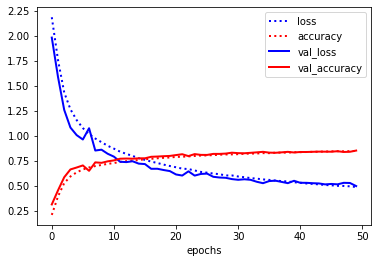

In [19]:
def build_model_1_3():
  from tensorflow.keras import initializers
  from tensorflow.keras import regularizers
  initializer = initializers.GlorotNormal(seed=1)
  regularizer = None

  model = models.Sequential()

  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
  

  model.add(layers.Dense(512,kernel_initializer=initializer, activation='relu',kernel_regularizer=regularizer))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(256,kernel_initializer=initializer,activation='relu',kernel_regularizer=regularizer)) 
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(128,kernel_initializer=initializer,activation='relu',kernel_regularizer=regularizer)) 
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(64,kernel_initializer=initializer,activation='relu',kernel_regularizer=regularizer))
  model.add(layers.Dropout(0.2))

  
  model.add(layers.Dense(10,kernel_initializer=initializer,activation='softmax'))

  model.compile(optimizer=optimizers.SGD(momentum=0.7,nesterov=True),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=64)

answer_q_1_3 = """I tried to use batch normalization for each layer or L2 regularization but performance decreased.
Since the network is shallow, I've used dropout(0.1) and for the last layer dropout(0.2), to make the model generalize better.
Also, I used the Xavier Normal weights initialization(to speed up the training),64 batches per epoch.
Tweaking the learning rate (e.g. 0.001 or e.01) resulted in worse models. The model is not overfitting anymore and the accuracy on validation set slightly increased (>85%)
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_202 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_233 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_203 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_234 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_204 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_235 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_102 (M

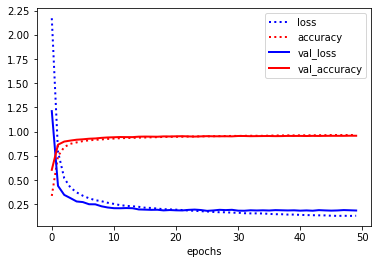

In [20]:
def build_model_2_1():
  from tensorflow.keras import initializers

  initializer = initializers.GlorotNormal()

  model = models.Sequential()
  
  model.add(layers.Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=(32, 32, 1),kernel_initializer=initializer,))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())

  model.add(layers.MaxPooling2D((2, 2),strides=1))
  model.add(layers.Dropout(.3))

  model.add(layers.Conv2D(64, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())


  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(.4))

  model.add(layers.Conv2D(128, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())

  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(.5))

  model.add(layers.Conv2D(256, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, (3, 3),activation='relu', padding='same',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())

  model.add(layers.MaxPooling2D((2, 2),padding='same'))
  model.add(layers.Dropout(.6))

  model.add(layers.Flatten())
  model.add(layers.Dense(512,activation='relu',kernel_initializer=initializer))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(.7)) #regularization


  model.add(layers.Dense(10, activation='softmax',kernel_initializer=initializer)) 
  model.compile(optimizer=optimizers.SGD(learning_rate = 0.01, decay=2e-4,momentum=0.7,nesterov=True), #lr changed
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=128)

answer_q_2_1 = """Following the guidelines showed in class, I've used increasing number of conv2D filters with zero pad,and dropout rates.
Hence,the NN starts first learning simple patterns and then higher combinations of these ones.
The BatchNorm reduces the covariance shift: it s possible to learn faster and it introduces some noise,resulting in better generalization.
I decided to use the MaxPool, halving the image every time. I started with 3 blocks of 2xConv2D and one dense layer, resulting in a good(>90% val acc) but overfitted more and had lower val_acc.
I used the NAG optimizer(mu=0.7),the XavierNorm init, lr=0.01 and decay rate=2e-4 to dinamycally reduce the lr. The final model(4x3xConv2D)
performs well with val_acc equal to 95.75%,the learning curve is smooth but quite overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))





-

























### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_432 (Conv2D)          (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_468 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_433 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_469 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_434 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_470 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_144 (M

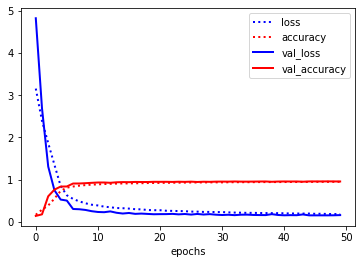

In [21]:
# Note that I build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
imgen = ImageDataGenerator(
                           rotation_range=5,
                           zoom_range=0.2,
                           shear_range=0.2,
                           width_shift_range=.2, 
                           height_shift_range=.2,
                              
                           
)

img_flow = imgen.flow(rgb2gray(X_train),y_train,batch_size=128)


         
augmented_split = img_flow, rgb2gray(X_val), y_val

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, generator=True,
               train=False, epochs=50, batch_size=None, steps_per_epoch=int(X_train.shape[0] / 128))

answer_q_2_2 = """Data augmentation helps the model to learn more meaninful patterns and reduce overfitting.
In this case tho, only small changes resulted in better performance and horizontal and vertical flip worsened it.
That's probably because numbers in the data are already quite shifted, rotate, and sheared (too much augmentation can make numbers unrecognizable) .
Also, flipping numbers don't make any sense. The final modelreaches 95.94% accuracy on val set and it s not ovefitting!
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [40]:
test_accuracy_3_1 ='0.9583'

def plot_confusion_matrix():
  from sklearn.metrics import confusion_matrix
  model = load_model_from_file(base_dir, 'model_2_2')
  y_pred = model.predict(rgb2gray(X_test))

  #print(np.nonzero(np.argmax(y_pred,axis=1) == np.argmax(y_test,axis=1))[0].shape[0] / len(y_pred))

  mtx = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(mtx)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels([1,2,3,4,5,6,7,8,9,0])
  ax.set_yticklabels([1,2,3,4,5,6,7,8,9,0])
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,mtx[i%10,int(i/10)], ha="center", va="center", color="w")
  pass


def plot_misclassifications():
  #retrieve model
  model = load_model_from_file(base_dir, 'model_2_2')
  y_pred = model.predict(rgb2gray(X_test))

  idx_number = 6 #Hence,number 7

  misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
  db = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
  [db[a].append(idx) for a,idx in zip(np.argmax(y_test[misclassified_samples],axis=1),misclassified_samples)]

  
  num = 13
  c = np.random.choice(db[idx_number],num)
  
  fig, axes = plt.subplots(nrows=1,ncols=num,sharey=True,figsize=(20,20))
  for n in range(len(c)):
    axes[n].imshow(X_test[c[n]],cmap='gray')
    res1 = np.argmax(y_test[c[n]])
    res2 = np.argmax(y_pred[c[n]])
    text = 'True: '+str((res1+1)%10)+'\nPredicted: '+ str((res2+1)%10)
    axes[n].set_xlabel(text) # Label is index+1
    axes[n].set_xticks(()), axes[n].set_yticks(())
  plt.show()

  #Show percentage of missclassified per value
  text = "n. {} : {:.2f} % missclassified"
  [print(text.format((a+1)%10,100*(len(db[a])) /(np.argmax(y_test,axis=1) == a).sum())) for a in db.keys()]
     
  pass

#You can write up to 800 chars
answer_q_3_1 = """
The classes misclassified the most are 7,3, 9. The dataset is unbalanced, therefore I thought that it was more meaningful
to consider the proportion of missclassified examples. The 7 is missclassified 5.65% of the times and the 2 and 0 are the numbers missclassified the least. 
Plotting some missclassified pictures for a particular number shows that some images are very blurry and noisy and hard to classify also for humans.
In addition, the are some images that present multiple digits and therefore the model recognize one digit rather than the labelled one.
The 7 is mostly missclassified with a 1 and it's reasanoble since the bottom part of the numbers is similar. Surprisingly, the 3 is mostly missclassified
with the 5,probably meaning that the model focus on the curvature at the bottom
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 799 characters long


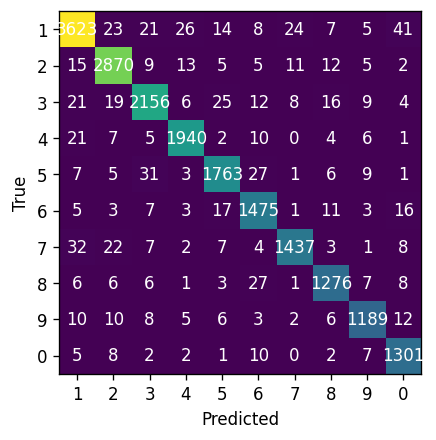

In [41]:
plot_confusion_matrix()

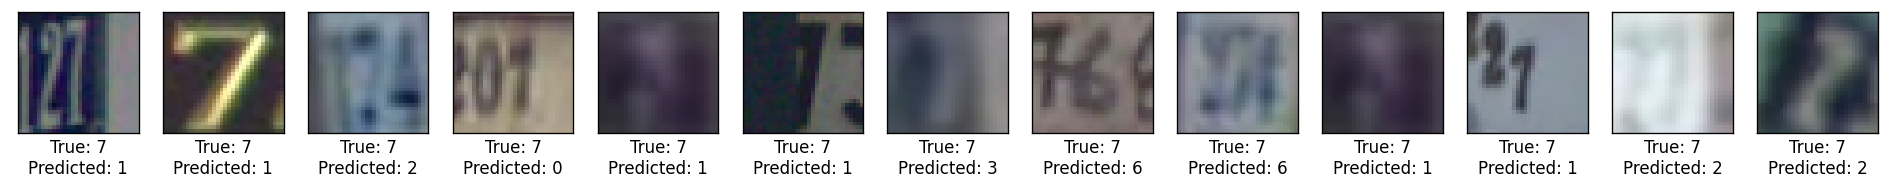

n. 1 : 4.46 % missclassified
n. 2 : 2.61 % missclassified
n. 3 : 5.27 % missclassified
n. 4 : 2.81 % missclassified
n. 5 : 4.86 % missclassified
n. 6 : 4.28 % missclassified
n. 7 : 5.65 % missclassified
n. 8 : 4.85 % missclassified
n. 9 : 4.96 % missclassified
n. 0 : 2.77 % missclassified


In [42]:
plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [25]:
def plot_activations():
  
  #Load the model 
  
  model = load_model_from_file(base_dir, 'model_2_2')

  layer_names = []
  for layer in model.layers:
    layer_names.append(layer.name)

  img_tensor = rgb2gray(X_test)[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 

  #Retrieve activations output from the model
  
  layer_outputs = [layer.output for layer in model.layers]
  activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
  activations = activation_model.predict(img_tensor)



  images_per_row = 16
  blocks = [1,1,2,3,4] #blocks of conv layers
  layers = [0,2,10,17] #Interesting layers
  for layer_index,block in zip(layers,blocks):

    start = layer_index
    end = layer_index+1
    
    
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

       
        size = layer_activation.shape[1]

        #activation channels tiled in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title("Activation of layer {} ({}) - Conv2D block {}".format(layer_index+1,layer_name,block))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()

    pass

answer_q_3_2 = """
Lots of filters of the first layer don't react to 8 and other mostly keep the image the same which is good
because propogate the image deeper in the network. Second layer's filters mostly are edge detectors for different orientation.
Interestingly,the 3rd layer filters (low res) react mostly to the curvy edges and to the circles in the midst of the 8.
Deeper in the nn, resolution is very low and some filter doesn't react at all. However, the curvature of the number eight is found
relevant
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 495 characters long


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


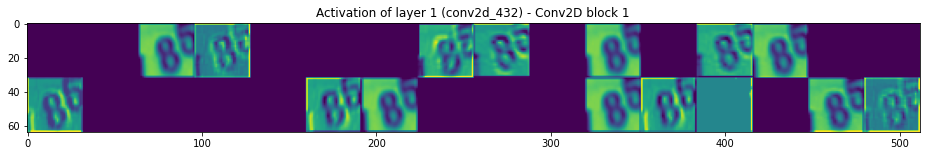

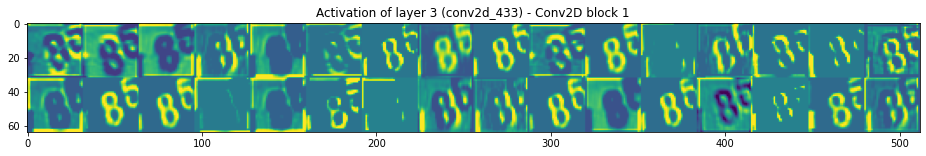

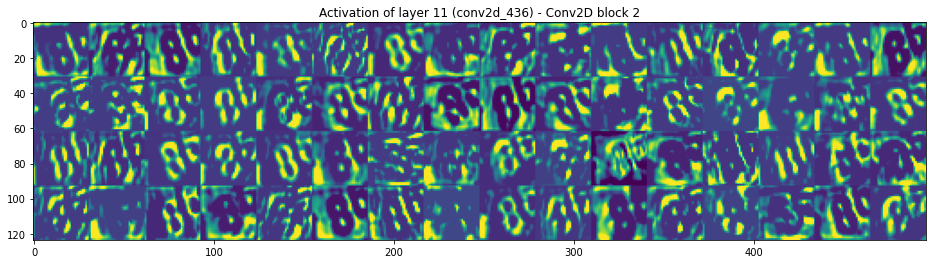

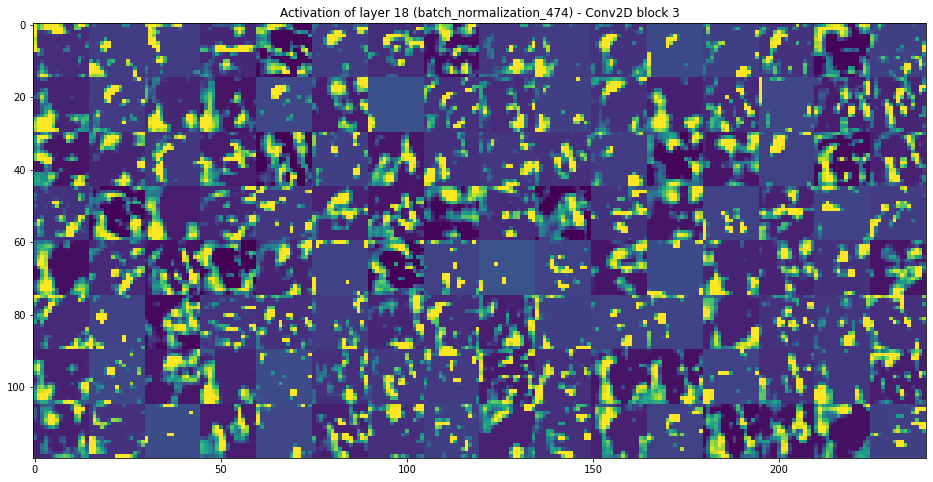

In [26]:
plot_activations()

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpose the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [0]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K
import cv2

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


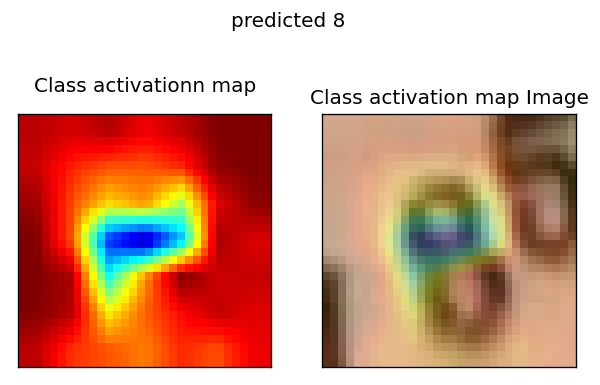

In [28]:
def plot_3_3():

  
  tf.compat.v1.disable_eager_execution()
  K.clear_session()


  
  model = load_model_from_file(base_dir, 'model_2_2')

  idx_img = 0 #example of number
  

  x = rgb2gray(X_test)[idx_img]
  x = np.expand_dims(x, axis=0)
  
  eight_output = model.output[:, 7] #7 -> output layer that corresponds to the label number 8

  last_conv_layer = model.layers[-9]

  grads = K.gradients(eight_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

 
  
  for i in range(256):  #256: number of filters in the last conv2d layer
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap,(32,32))
  heatmap = np.uint8(255*heatmap)
  heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
  
  y_pred = (np.argmax(model.predict(rgb2gray(X_test)[idx_img][np.newaxis,:]))+1)%10
  
  sup_img = heatmap*0.001+X_test[idx_img] #0.001 is intensity factor for the heatmap--> can be tweaked
  rgb_img = cv2.cvtColor(sup_img.astype(np.float32),cv2.COLOR_RGB2RGBA)

  plt.rcParams['figure.dpi'] = 120
  fig,(ax1,ax2) = plt.subplots(1,2)
  
  ax1.matshow(heatmap)
  ax2.imshow(rgb_img)

  ax1.set_title('Class activationn map')
  ax2.set_title('Class activation map Image')
  plt.suptitle("predicted {}".format(y_pred))
  ax1.set_yticks([])
  ax1.set_xticks([])
  ax2.set_xticks([])
  ax2.set_yticks([])
  
  
  
  pass

#The network does focus on the curvature present in the midst of the number 8. It's unique charachteristic for that precise number
#Satisfied about the result


plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

58892288/58889256 [==============================] - 0s 0us/step
Loading model from file
Success!
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_91 (Dense)             (None, 10)                5130      
Total params: 14,982,474
Trainable params: 7,347,210
Non-trainable params: 7,635,264
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.000387  0.577505  0.578945      0.658903
max  1.233805  0.999984  1.105511

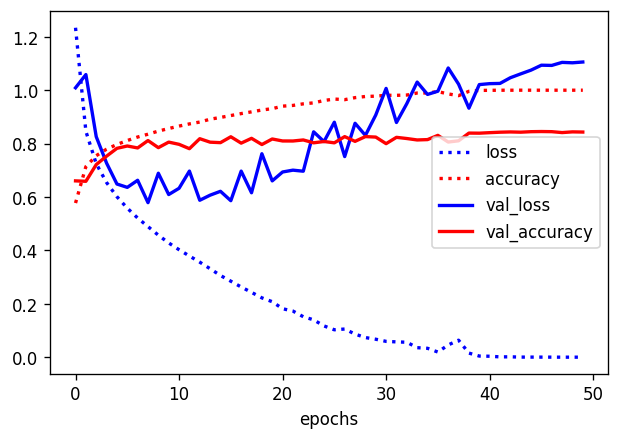

In [29]:
def build_model_4_1():

  from tensorflow.keras.applications.vgg16 import VGG16
  from tensorflow.keras import layers
  vgg16 = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
  
  model = models.Sequential(
      [vgg16,
       layers.Flatten(),
       layers.Dense(512,activation='relu'),
       layers.Dense(10,activation='softmax')]
  )

  for layer in vgg16.layers[:-4]:
    layer.trainable = False

  model.compile(optimizer=optimizers.SGD(learning_rate = 0.001,momentum=0.7,nesterov=True),
                loss='categorical_crossentropy', metrics=['accuracy'])

  return model



run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=64)

answer_q_4_1 = """By freezing all vgg16 layers I have bad results(i.e. <60%). Hence,I used fine-tuning,leaving the last conv2D block trainable
I think the feat.extraction approach isn't the best since imageNet and SVHN tasks are different. 
However,with fine tuning the first layers likely remains edge/local patt. detectors and the last Conv2D block can learn pattern for the SVHN, 
resulting in better accuracy (84.52%).
However,the model overfits a lot(because no Dropout/BatchNorm layer present in the VGG16)
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [30]:
!git clone --recursive https://github.com/microsoft/LightGBM ; cd LightGBM
!mkdir build ; cd build
!cmake ..
!make -j4

Cloning into 'LightGBM'...
remote: Enumerating objects: 17505, done.
remote: Total 17505 (delta 0), reused 0 (delta 0), pack-reused 17505
Receiving objects: 100% (17505/17505), 11.91 MiB | 27.22 MiB/s, done.
Resolving deltas: 100% (12770/12770), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/21728), 8.51 MiB | 26.00 MiB/s, done.
Resolving deltas: 100% (17565/17565), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'
CMake Error: The source directory "/" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.


In [43]:
import pickle
import gzip
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import lightgbm as lgb

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings(X_train,X_test):
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, 'model_4_1')
  model.pop()
  model.pop()
  
  embed_train = model.predict(X_train)
  embed_test = model.predict(X_test)

  store_embedding(embed_train,'train')
  store_embedding(embed_test,'test')

  return embed_train,embed_test 

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  pipeline = make_pipeline(lgb.LGBMClassifier(n_jobs=-1,objective = "softmax"))
  #pipeline2 = make_pipeline(StandardScaler(),PCA(),KNeighborsClassifier())
  #pipeline3 = make_pipeline(StandardScaler(),PCA(n_components='mle',svd_solver='full'),SVC())


  return pipeline
  pass

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  print('Training ')
  pipeline.fit(X_train,y_train)
  print('Testing')
  return pipeline.score(X_test,y_test)


def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.

  """
  try:
    embed_train = load_embedding('train')
    embed_test  = load_embedding('test')
  except:
    embed_train,embed_test = store_embeddings(X_train, X_test)

  pipeline = generate_pipeline()
  return evaluate_pipeline(pipeline,embed_train,np.argmax(y_train,axis=1),embed_test,np.argmax(y_test,axis=1))
  pass

answer_q_4_2 = """
I've loaded the model_4_1 and kept only the Conv2D blocks and then computed the embedding for both X_test and X_train.
Later, I've tried some combinations of as PCA, Scalers, KNN, and RandomForest, Boosting and choosed a pipeline.
At the end, I've used the GradientBoosting implemented in the lightgbm library and I've found similar results. It's the fastest one with test_acc = 0.8387.
However,non-deep learning techniques with embedded features didn't outperform the deep learning solution.
"""

#I've also tried to use gama autoML with the embeddings but couldn't find a remarkably better pipeline. 

print("Pipeline:",generate_pipeline())
print(evaluation_4_2(X_train,y_train,X_test,y_test))
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('lgbmclassifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective='softmax',
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)
Training 
Testing
0.839963742572263
Answer is 493 characters long
